In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('suicide_rate.csv')

In [3]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [4]:
len(data)

27820

In [5]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
data = data.drop(['HDI for year','country-year'], axis=1)

In [8]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [43]:
len(data['country'].unique().tolist()) #Find the number of countries that are in this dataset

101

In [9]:
data['year'].sort_values() #Data is from 1985 to 2016

21632    1985
21637    1985
21638    1985
21639    1985
21640    1985
         ... 
6622     2016
17447    2016
17446    2016
7415     2016
20927    2016
Name: year, Length: 27820, dtype: int64

In [10]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
data.groupby('sex').count() #check if the data have the equal number of female and male to make sure dataset is fair

,country,year,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
sex,,,,,,,,,
female,13910,13910,13910,13910,13910,13910,13910,13910,13910
male,13910,13910,13910,13910,13910,13910,13910,13910,13910


In [12]:
data['age'].unique() #grouping of age

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [13]:
data.groupby('age').count() #5-14 years old have 32 fewer rows than the others. Should not be a problem since it is a huge dataset

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
age,,,,,,,,,
15-24 years,4642,4642,4642,4642,4642,4642,4642,4642,4642
25-34 years,4642,4642,4642,4642,4642,4642,4642,4642,4642
35-54 years,4642,4642,4642,4642,4642,4642,4642,4642,4642
5-14 years,4610,4610,4610,4610,4610,4610,4610,4610,4610
55-74 years,4642,4642,4642,4642,4642,4642,4642,4642,4642
75+ years,4642,4642,4642,4642,4642,4642,4642,4642,4642


In [14]:
data['generation'].unique() #grouping of generation depending on age

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [15]:
len(data['gdp_per_capita ($)'].unique().tolist()) #gdp per capita using country and year

2233

In [17]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0.5, 1.0, 'Gender Count')

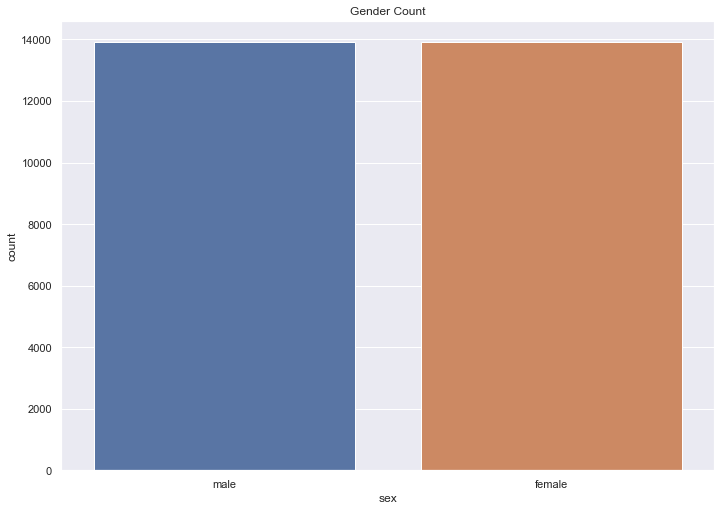

In [18]:
#Division of gender is the dataset (Trying to see if both male and female have equal row)
sns.countplot(x='sex', data=data).set_title("Gender Count")

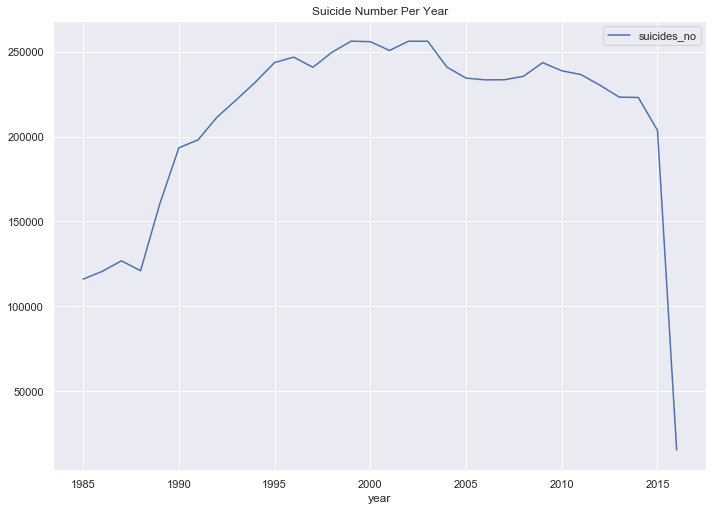

In [19]:
#Looking at suicide number per year
newData = data.groupby('year')[['suicides_no']].sum()
newData.plot(title='Suicide Number Per Year')

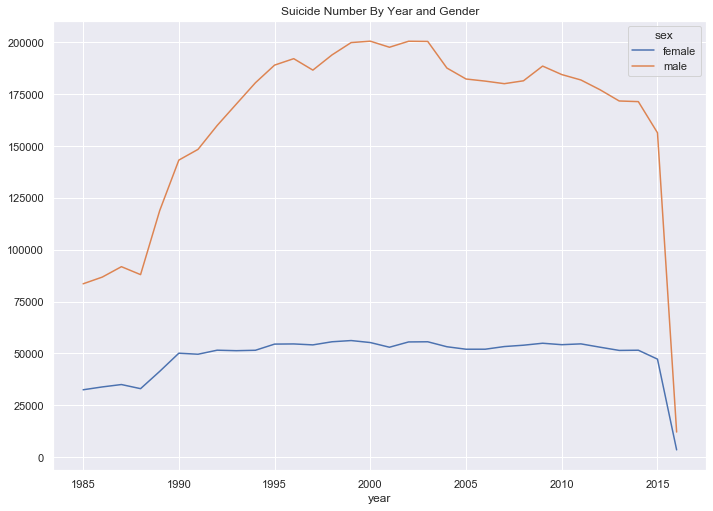

In [20]:
newData2 = data.pivot_table('suicides_no',index='year',columns='sex',aggfunc=sum)
newData2
newData2.plot(title = 'Suicide Number By Year and Gender')
#The spike of suicide in 1989 is probably caused by the recession

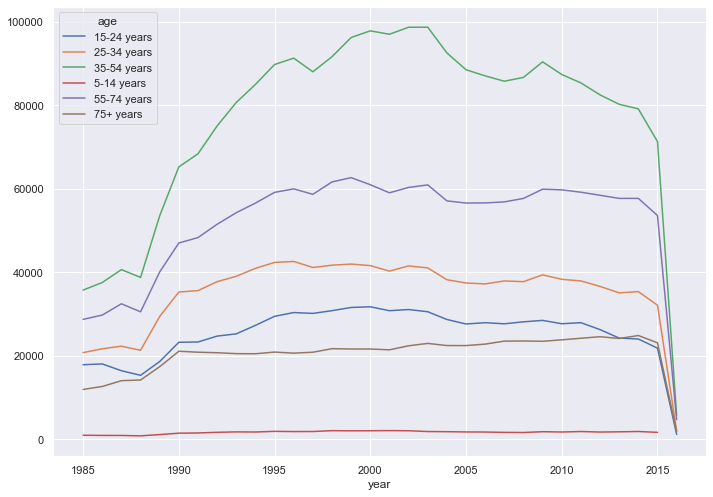

In [21]:
newData3 = data.pivot_table('suicides_no',index='year',columns='age',aggfunc=sum)
newData3.plot()

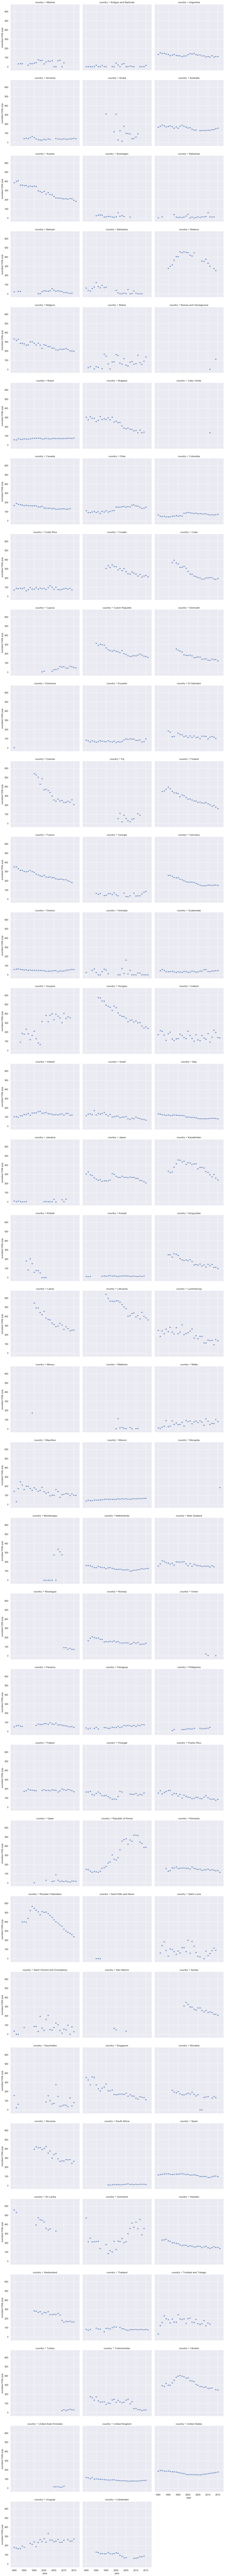

In [71]:
newData4 = data.groupby(['country','year'],as_index=False).sum()
sns.relplot(data=newData4,x='year',y='suicides/100k pop', col = 'country', col_wrap = 3)
#Total Suicide/100k pop per year by countries

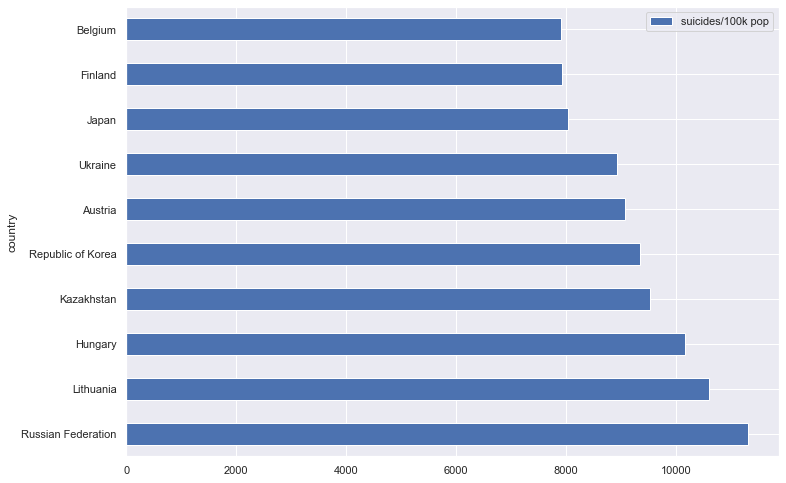

In [72]:
#Trying to look at top 10 countries that has the highest suicide proportion
newData5 = data.groupby('country')[['suicides/100k pop']].sum().reset_index().sort_values('suicides/100k pop', ascending=False)
newData5.head(10).plot(x='country',y='suicides/100k pop',kind='barh')

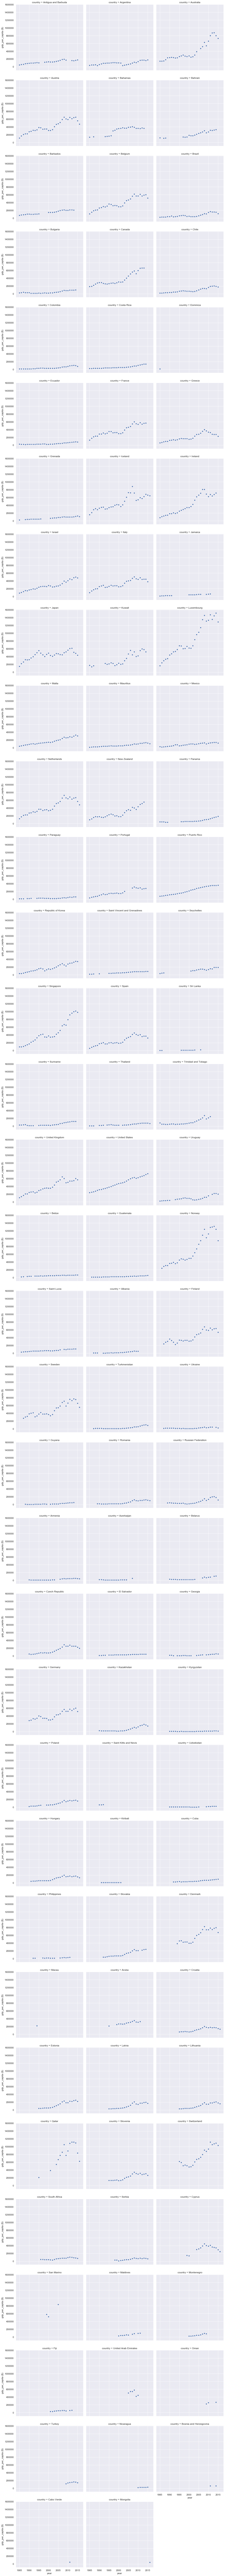

In [73]:
newData6 = data.groupby(['year','country'])[['gdp_per_capita ($)']].sum().reset_index()
sns.relplot(data=newData6, x='year',y='gdp_per_capita ($)', col = 'country', col_wrap = 3)

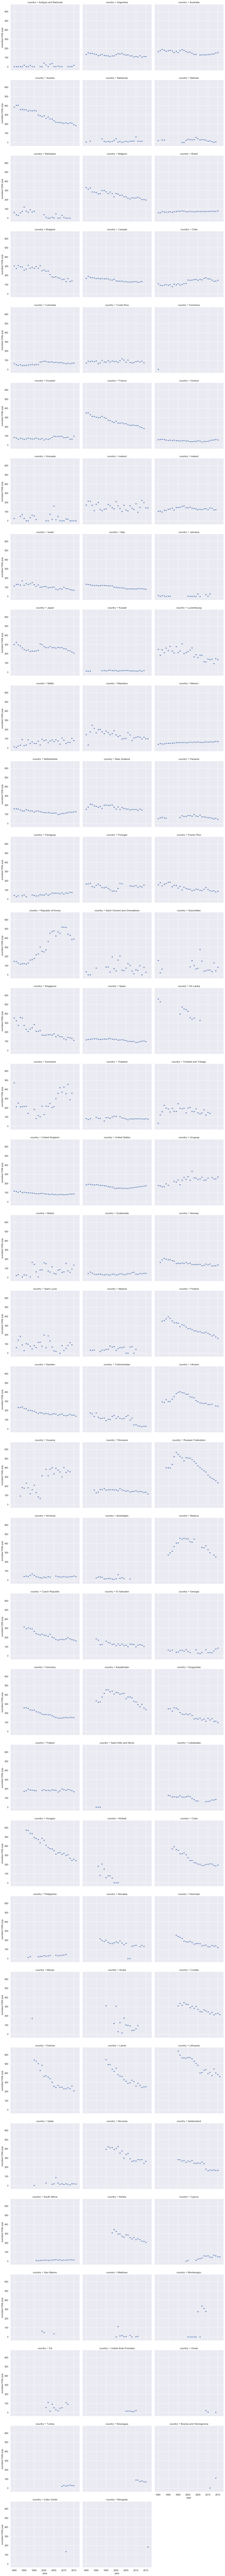

In [74]:
newData7 = data.groupby(['year','country'])[['suicides/100k pop']].sum().reset_index()
sns.relplot(data=newData7, x='year', y='suicides/100k pop', col='country', col_wrap = 3)
#with this plot and the plot above we can see the correlation between gdp_per_capita and suicides/100k pop for each country

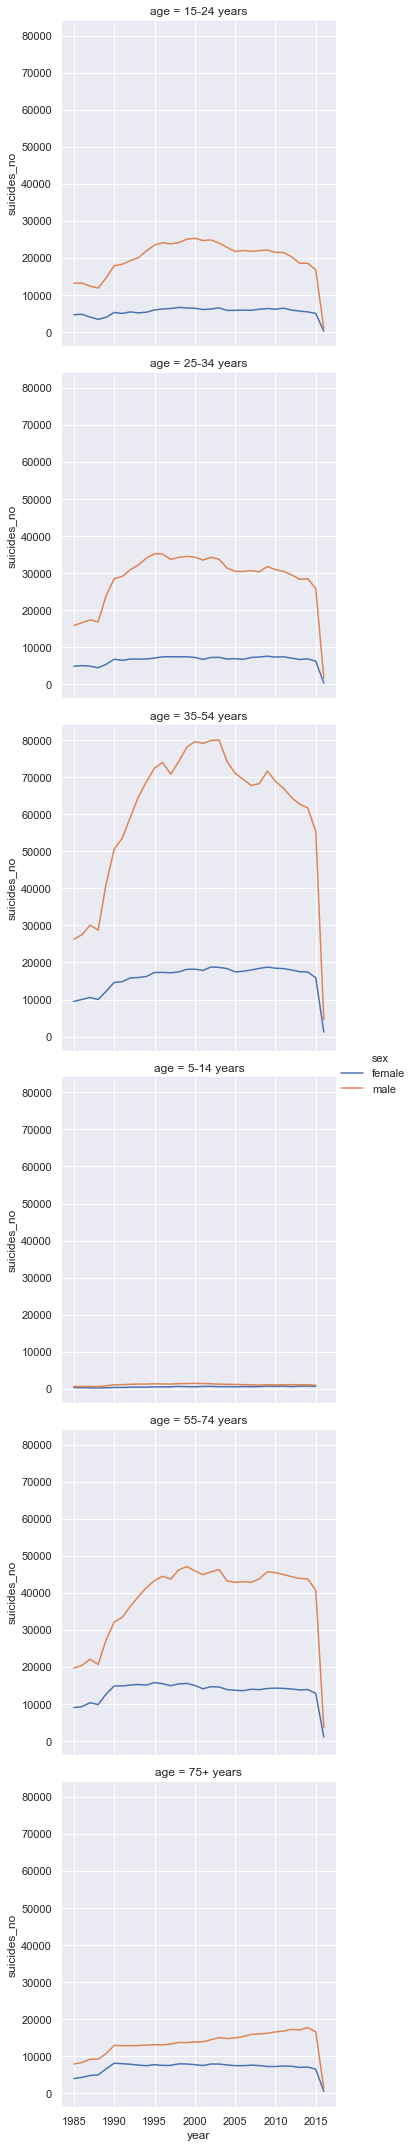

In [75]:
#Suicide number per age group and gender over the years
newData8 = data.groupby(['age','sex','year'])[['suicides_no']].sum().reset_index()
sns.relplot(data = newData8, x='year',y='suicides_no',hue='sex',row='age',kind='line')

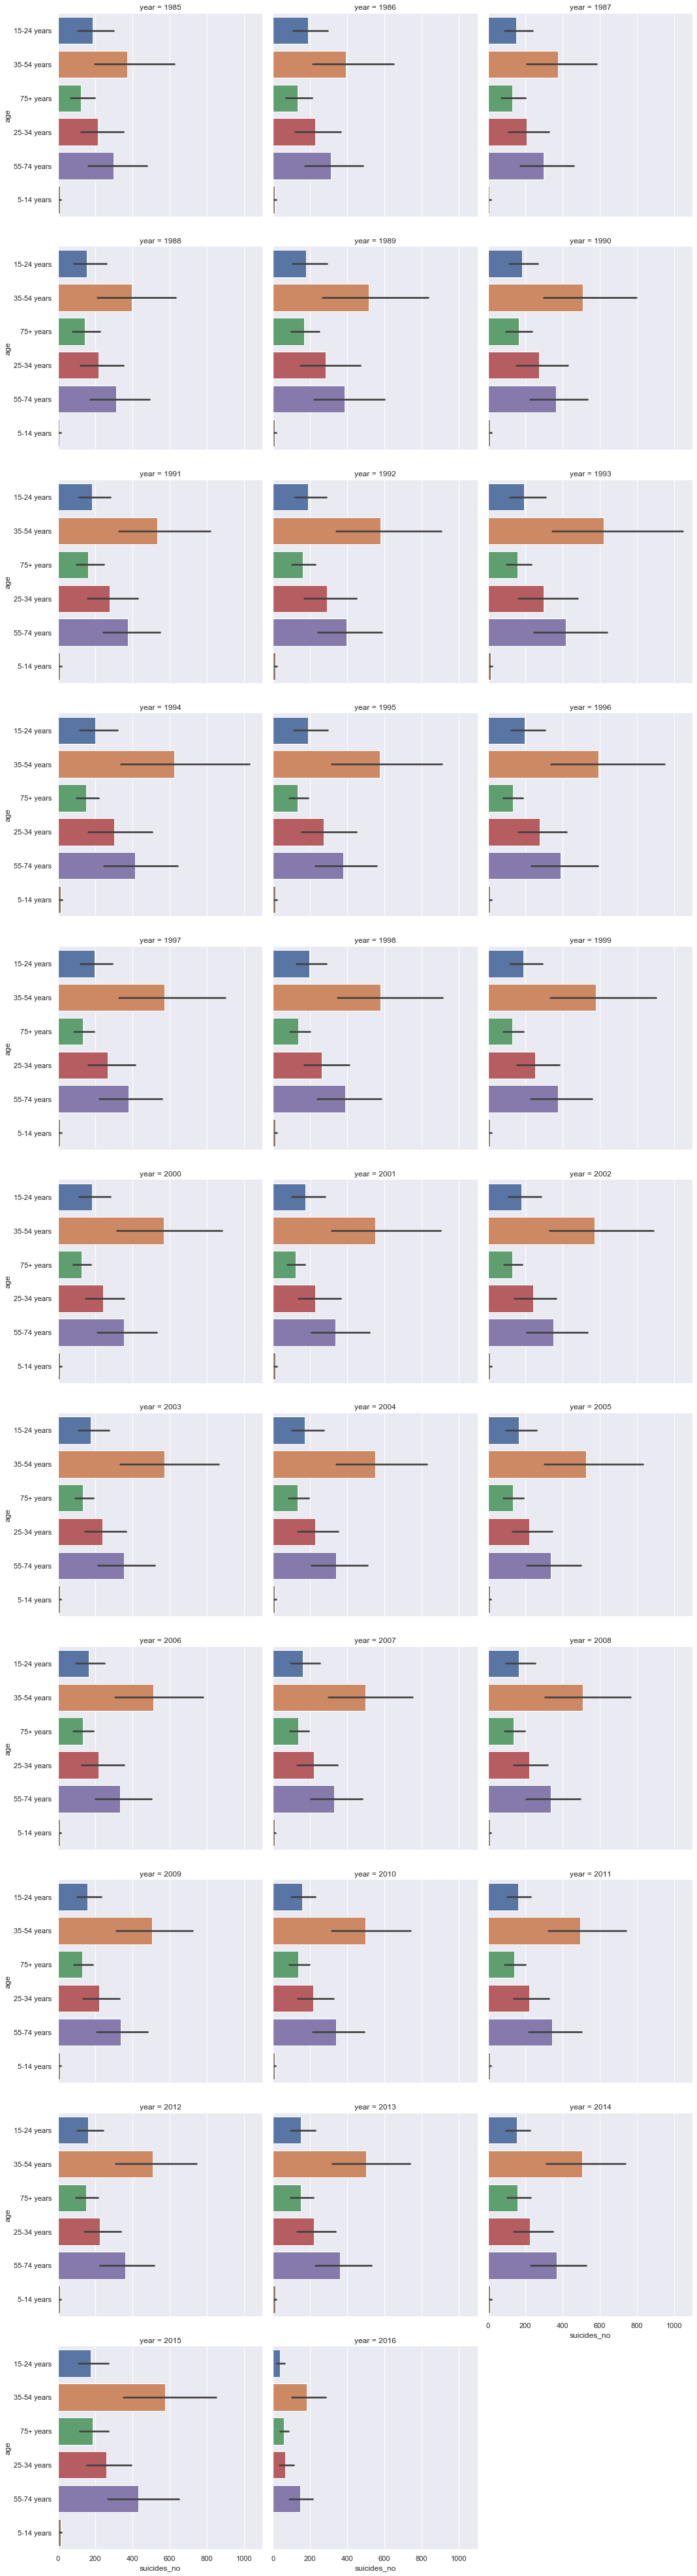

In [76]:
sns.catplot(data=data, x='suicides_no',y='age',col='year',col_wrap=3,kind='bar')

In [23]:
#Data Cleaning
#Deleting Countries with less than 150 row of data (arbritary numbers) so we only take countries that has a lot of data 
countries = [data[data.country == country] for country in data['country'].unique().tolist() if len(data[data.country == country]) >= 150]
activeCountries = pd.concat(countries, ignore_index = True)
activeCountries

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
26773,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
26774,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
26775,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
26776,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z
